In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# loading the dataset
dataframe = pandas.read_csv('Harangi.csv', usecols=[6,7,8], engine='python')
dataframe

,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
0,2835.90,142,0
1,2836.09,239,0
2,2836.22,166,0
3,2836.31,118,0
4,2836.41,130,0
...,...,...,...
3316,2828.07,239,770
3317,2827.13,221,770
3318,2826.17,220,760
3319,2825.39,217,660


In [ ]:
#loading the dataset
df=pandas.read_csv(r'Harangi.csv')
df.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,37,Harangi,2011,1,2011-01-01,3.74,2835.90,142,0,HARANGI-2011-01-01
1,38,Harangi,2011,1,2011-01-02,3.76,2836.09,239,0,HARANGI-2011-01-02
2,39,Harangi,2011,1,2011-01-03,3.77,2836.22,166,0,HARANGI-2011-01-03
3,40,Harangi,2011,1,2011-01-04,3.78,2836.31,118,0,HARANGI-2011-01-04
4,41,Harangi,2011,1,2011-01-05,3.79,2836.41,130,0,HARANGI-2011-01-05


In [ ]:
df['UNIQUE_KEY'] = df['UNIQUE_KEY'].apply(lambda x : x[8:])

In [ ]:
df = df.drop(columns=['SL_NO'])
df = df.drop(columns=['RESERVOIR'])


In [ ]:
df.head()

,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,2011,1,2011-01-01,3.74,2835.90,142,0,2011-01-01
1,2011,1,2011-01-02,3.76,2836.09,239,0,2011-01-02
2,2011,1,2011-01-03,3.77,2836.22,166,0,2011-01-03
3,2011,1,2011-01-04,3.78,2836.31,118,0,2011-01-04
4,2011,1,2011-01-05,3.79,2836.41,130,0,2011-01-05


In [ ]:
import datetime as dt

In [ ]:
df['UNIQUE_KEY'] = pandas.to_datetime(df['UNIQUE_KEY'])
df['UNIQUE_KEY'] = df['UNIQUE_KEY'].map(dt.datetime.toordinal)

In [ ]:
df = df.drop(columns=['FLOW_DATE'])

In [ ]:
 df = df.drop([499])
 df = df.drop([981])

In [ ]:
df.head()

,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,2011,1,3.74,2835.90,142,0,734138
1,2011,1,3.76,2836.09,239,0,734139
2,2011,1,3.77,2836.22,166,0,734140
3,2011,1,3.78,2836.31,118,0,734141
4,2011,1,3.79,2836.41,130,0,734142


In [ ]:
dataset = df.to_numpy()
dataset = df.astype('float32')
dataset

,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,2011.0,1.0,3.74,2835.899902,142.0,0.0,734138.0
1,2011.0,1.0,3.76,2836.090088,239.0,0.0,734139.0
2,2011.0,1.0,3.77,2836.219971,166.0,0.0,734140.0
3,2011.0,1.0,3.78,2836.310059,118.0,0.0,734141.0
4,2011.0,1.0,3.79,2836.409912,130.0,0.0,734142.0
...,...,...,...,...,...,...,...
3316,2020.0,50.0,3.24,2828.070068,239.0,770.0,737771.0
3317,2020.0,50.0,3.19,2827.129883,221.0,770.0,737772.0
3318,2020.0,50.0,3.14,2826.169922,220.0,760.0,737773.0
3319,2020.0,50.0,3.10,2825.389893,217.0,660.0,737774.0


In [ ]:
dataset = np.array(dataset)

In [ ]:
X = dataset[:,3:6]
X
Y = dataset[:, 3:6]
Y

array([[2835.9 ,  142.  ,    0.  ],
       [2836.09,  239.  ,    0.  ],
       [2836.22,  166.  ,    0.  ],
       ...,
       [2826.17,  220.  ,  760.  ],
       [2825.39,  217.  ,  660.  ],
       [2824.65,  219.  ,  640.  ]], dtype=float32)

In [ ]:
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# evaluating model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		print('>%.3f' % mae)  #Mean Absolute Error as evaluation metrics
		results.append(mae)
	return results

In [ ]:
def plot_future(prediction, y_test=[0,0,0]):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    #plt.ylim(2500, 3000)
    #plt.plot(np.arange(range_future), np.array(y_test), label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction), label='MAE')
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Water Levels Daily in Feet')

In [ ]:
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

In [ ]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 20)                80        
_________________________________________________________________
dense_91 (Dense)             (None, 3)                 63        
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate model
results = evaluate_model(X, Y)

# summarize performance
print(results)
print('MAE: %.3f (%.3f)' % (np.mean(results), np.std(results)))

>4.429
>3.761
>4.218
>4.894
>4.417
>7.912
>3.286
>15.331
>3.956
>4.835
>4.384
>4.230
>6.599
>10.010
>3.746
>4.564
>6.340
>4.499
>7.351
>5.784
>2.059
>3.885
>4.804
>2.084
>5.327
>2.865
>4.568
>8.909
>5.784
>4.949
[4.428732872009277, 3.760965347290039, 4.218443870544434, 4.894001483917236, 4.417472839355469, 7.912192344665527, 3.286147117614746, 15.331000328063965, 3.956427574157715, 4.835126876831055, 4.383705139160156, 4.229616165161133, 6.599385738372803, 10.010334968566895, 3.7461044788360596, 4.563521862030029, 6.340485572814941, 4.49916410446167, 7.351241111755371, 5.784496784210205, 2.059117555618286, 3.88482666015625, 4.8039703369140625, 2.084040403366089, 5.32734489440918, 2.865314245223999, 4.568424224853516, 8.909332275390625, 5.784388065338135, 4.9486565589904785]
MAE: 5.326 (2.560)


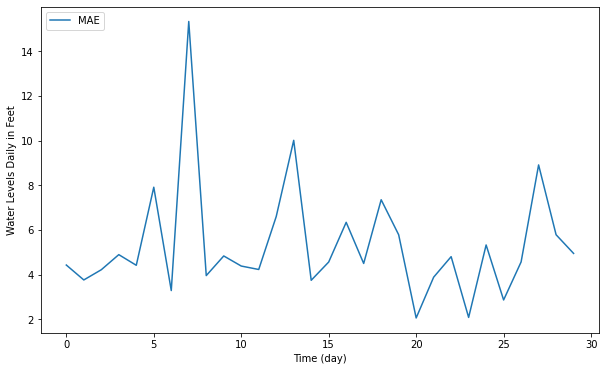

In [ ]:
plot_future(results)

In [ ]:
n_inputs, n_outputs = X.shape[1], Y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, Y, verbose=0, epochs=100)


[[2812.8633    152.8248     67.79549 ]
 [2812.92      122.77682    67.82771 ]
 [2812.9739    133.7944     67.815506]
 [2813.029     123.77828    67.82649 ]
 [2813.0688    123.77853    67.82649 ]
 [2813.1086    123.778404   67.82637 ]
 [2813.1584    123.77816    67.82637 ]
 [2813.194     113.762535   67.837234]]


In [ ]:
model.save('Harangi.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('Harangi.h5')

[[ 2.82815991e+03  1.43754028e+02 -1.07330871e+00]
 [ 2.82854004e+03  2.40604126e+02 -1.16425109e+00]
 [ 2.82852637e+03  1.67717041e+02 -1.09583068e+00]
 [ 2.82852197e+03  1.19791504e+02 -1.05078673e+00]
 [ 2.82864478e+03  1.31773071e+02 -1.06207824e+00]
 [ 2.82884766e+03  1.68715820e+02 -1.09674621e+00]
 [ 2.82884058e+03  1.19791626e+02 -1.05084777e+00]]
[[2836.81  112.      0.  ]
 [2836.93  160.      0.  ]
 [2837.06  172.      0.  ]
 [2837.23  100.      0.  ]
 [2837.23  100.      0.  ]
 [2837.3   100.      0.  ]
 [2837.37  100.      0.  ]]


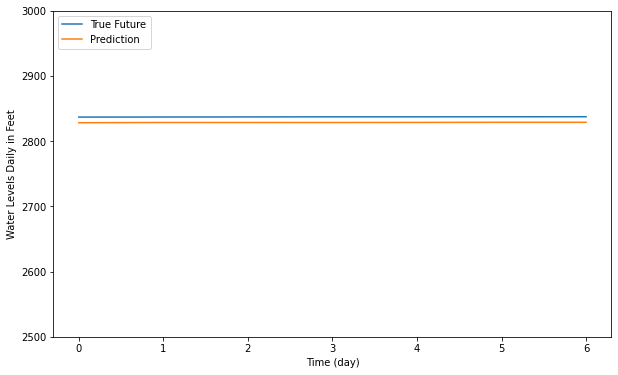

In [ ]:
newX = X[0:7]
trueY = X[8:15]
trueY = np.asarray(trueY)
newX = np.asarray(newX)
yhat = model.predict(newX)
print(yhat)
print(trueY)
plot_future(yhat[:,0], trueY[:,0])

In [ ]:
# make a prediction for new data
rows = [[2819.25, 154, 55],[2819.29, 124, 70],[2819.35, 135, 70], [2819.40, 125, 75], [2819.44, 125, 70], [2819.48,125,59],[2819.53,125,70],[2819.56, 115,79]]
newX = np.asarray(rows)
yhat = model.predict(newX)
print(yhat)

[[2811.6934    155.71806    53.898922]
 [2811.7046    125.76305    68.92149 ]
 [2811.7856    136.74608    68.91107 ]
 [2811.8262    126.76088    73.91859 ]
 [2811.856     126.76142    68.92055 ]
 [2811.8738    126.76264    57.924747]
 [2811.9458    126.76158    68.92054 ]
 [2811.9744    116.77624    77.92636 ]]


In [ ]:
print(np.asarray(rows))

[[2819.25  154.     55.  ]
 [2819.29  124.     70.  ]
 [2819.35  135.     70.  ]
 [2819.4   125.     75.  ]
 [2819.44  125.     70.  ]
 [2819.48  125.     59.  ]
 [2819.53  125.     70.  ]
 [2819.56  115.     79.  ]]


In [ ]:
import seaborn as sns

In [ ]:
trend = []
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6','Day 7']
for i in range(7):
  predicted_water_stress = yhat[i][2]/yhat[i][1] #outflow/inflow
  trend.append(predicted_water_stress)


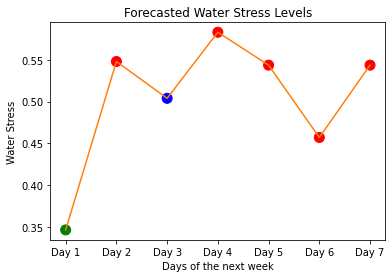

In [ ]:
sizes = [100,100,100,100,100,100,100]
plt.plot(trend, color='tab:orange')
plt.scatter(np.arange(0,7), trend, marker='o', c=['green','red','blue','red', 'red', 'red', 'red'], s=sizes)
plt.xticks(np.arange(0,7), days)
plt.xlabel('Days of the next week')
plt.ylabel('Water Stress')
plt.title('Forecasted Water Stress Levels')
plt.show()

Figure 1: The above graph plots the forecasted water stress levels of the following week based on the previous week's data. \
 (Harangi Water Reservoir)

In [ ]:
trend

[0.34613147,
 0.54802656,
 0.50393456,
 0.58313406,
 0.54370284,
 0.4569544,
 0.5437021]

In [ ]:
indicator = []
for i in trend:
  if i >= 0.4:
    indicator.append("DANGER: SEVERELY STRESSED")
  elif i < 0.4 and i >= 0.2:
    indicator.append("WARNING: WATER STRESSED CONDITIONS")
  else:
    indicator.append("STABLE")
print(indicator)

['WARNING: WATER STRESSED CONDITIONS', 'DANGER: SEVERELY STRESSED', 'DANGER: SEVERELY STRESSED', 'DANGER: SEVERELY STRESSED', 'DANGER: SEVERELY STRESSED', 'DANGER: SEVERELY STRESSED', 'DANGER: SEVERELY STRESSED']


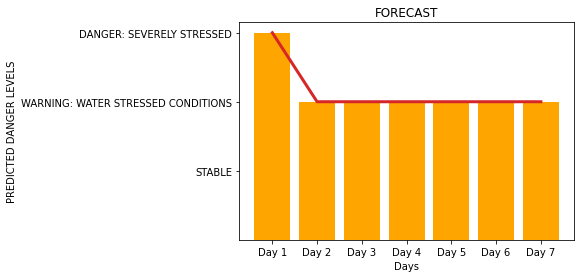

In [ ]:
plt.plot(range(1,8), [2 if x=='DANGER: SEVERELY STRESSED' else 3 for x in indicator], color='tab:red', linewidth= 3.0)
plt.bar(range(1,8), [2 if x=='DANGER: SEVERELY STRESSED' else 3 for x in indicator], align='center', color='orange')
plt.xticks(range(1,8), days)
plt.yticks([1,2,3],["STABLE", "WARNING: WATER STRESSED CONDITIONS", "DANGER: SEVERELY STRESSED"])
plt.xlabel('Days')
plt.ylabel('PREDICTED DANGER LEVELS')
plt.title('FORECAST')
plt.show()

Figure 2: The above graph plots the water stress danger levels, the data generated corresponds to the predicted water levels for the next week based on the previous week's data.